In [3]:
import sys , ROOT
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/mySoftwarePackage/mac')
import pylab , numpy as np , pandas as pd , matplotlib as mpl , matplotlib.pyplot as plt , matplotlib.ticker as ticker , seaborn as sns
mpl.use('Agg')
from root_numpy import tree2array 
from ROOT import TPlots, TSchemeDATA
from larlite import *
from ROOT import PandoraNuTrack
import GeneralPlot as gp , Initiation as init, plot_tools as pt , my_tools
from root_pandas import read_root
dirname = init.createnewdir()
scheme  = TSchemeDATA()
%matplotlib inline
DataName = "BNB_5e19POT"
main_path = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna"
anafiles_path = main_path + "/TracksAnaFiles"
labels = ['proton' , 'muon', 'pion' , 'em' ]
colors = ['purple' , 'black', 'blue', 'red' ]

Welcome to ROOTaaS 6.06/02


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [4]:
branches_fast=['dEdx_Y','residual_range_Y','Edep_Y']
def read_tree_fast(filename,label='protons'):
    print 'processing %s data'%label
    print filename
    f = ROOT.TFile( anafiles_path + "/" + filename )
    tree = f.Get('TracksTree')
    print tree
    ana_arr = tree2array(tree,branches=branches_fast)
    resrange = np.concatenate(ana_arr['residual_range_Y']).ravel().tolist()
    dEdx = np.concatenate(ana_arr['dEdx_Y']).ravel().tolist()
    Edep = np.concatenate(ana_arr['Edep_Y']).ravel().tolist()
    df = pd.DataFrame(data={'residual-range':resrange,'dE/dx':dEdx,'Edep':Edep})

    data = df[df['residual-range']<100]
    data = data[data['residual-range']>0.1]
    data = data[data['dE/dx']>0.1]
    data = data[data['dE/dx']<30]
    print 'len(data %s) = %d'%(label,len(data))

    print 'read %s data'%label
    return data

def plot_dEdx_single_dataset( df , label='muons', Nmax = 10000):
    data = df[0:Nmax]
    if label=='protons': color='purple'
    elif label=='muons': color='black'
    elif label=='pions': color='blue'
    elif label=='em': color='red'
    print 'processing plot for ',label
    print 'len(data %s) = %d'%(label,len(data))
    g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color)
    print 'generated sns plot....'
    ax = g.ax_joint
    ax.text(30,0.8*data['dE/dx'].max(),label,color=color,fontsize=20)
    g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
    print 'done generating plot for ',label
  

In [5]:
df_all = read_tree_fast("Tracks_BNB_5e19POT_AnalysisTrees.root",label='all')
df_muons = read_tree_fast("Tracks_BNB_5e19POT_AnalysisTrees_multi_BNB_TrainedOn_MCBNB_MCCOSMIC_maxscore_muons_score_0.90.root",label='maxscored-muons, score>0.9')
df_protons =  read_tree_fast("Tracks_BNB_5e19POT_AnalysisTrees_multi_BNB_TrainedOn_MCBNB_MCCOSMIC_maxscore_protons_score_0.90.root",label='maxscored-protons, score>0.9')

processing all data
Tracks_BNB_5e19POT_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7f97ab84eb60>
len(data all) = 87297804
read all data
processing maxscored-muons, score>0.9 data
Tracks_BNB_5e19POT_AnalysisTrees_multi_BNB_TrainedOn_MCBNB_MCCOSMIC_maxscore_muons_score_0.90.root
<ROOT.TTree object ("TracksTree") at 0x7f96cef1cda0>
len(data maxscored-muons, score>0.9) = 2628921
read maxscored-muons, score>0.9 data
processing maxscored-protons, score>0.9 data
Tracks_BNB_5e19POT_AnalysisTrees_multi_BNB_TrainedOn_MCBNB_MCCOSMIC_maxscore_protons_score_0.90.root
<ROOT.TTree object ("TracksTree") at 0x7f94bd2fbe00>
len(data maxscored-protons, score>0.9) = 2743693
read maxscored-protons, score>0.9 data


processing plot for  muons
len(data muons) = 2628921
generated sns plot....
done generating plot for  muons
processing plot for  protons
len(data protons) = 2743693
generated sns plot....
done generating plot for  protons


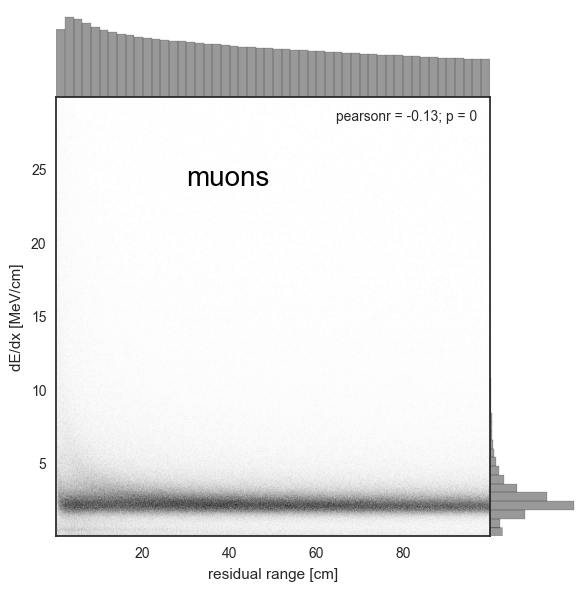

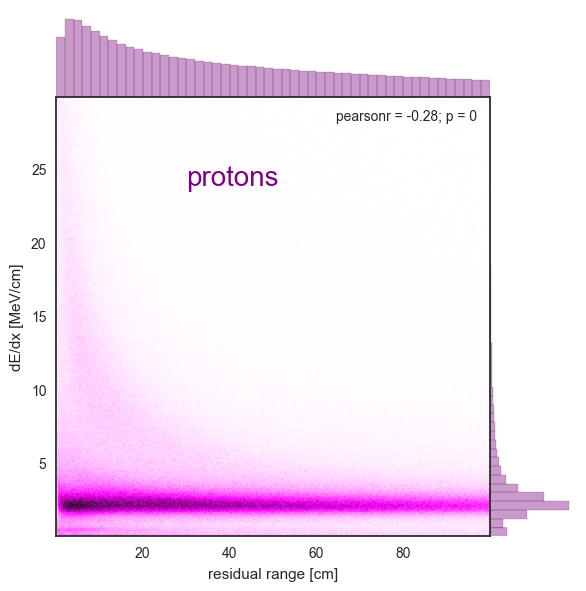

In [14]:
plot_dEdx_single_dataset( df_muons , 'muons' , 10000000 )
plot_dEdx_single_dataset( df_protons , 'protons' , 10000000 )